In [64]:
# 표준 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

# 한글 로딩
mpl.rc('font', family='Malgun Gothic')

batter = pd.read_csv("C:/python3/data/batter_stats_2017.csv")
batter_df = pd.DataFrame(batter)

for i in range(len(batter_df)):
    if batter_df['BABIP'].values[i]=='-':
        batter_df['BABIP'].values[i] = 0
        
batter_df['BABIP'] = batter_df['BABIP'].astype(float, inplace = True)
bat_mean = batter_df.mean()                             # 전체 평균
bat_ss = batter_df[batter_df['팀명']=='삼성']           # 삼성만 추출
bat_ss_mean = bat_ss.mean()                             # 삼성 평균
bat_means = pd.concat((bat_mean, bat_ss_mean), axis=1)  # 전체+삼성 평균
bat_means = bat_means.T
bat_means = round(bat_means, 2)

# 관련성 떨어지는것 or 겹치는 것 제거, OPS=출루율+장타율
bat_means.drop(['타석','타수','출루율','장타율','연봉(2018)'], axis=1, inplace=True)  
bat_means.index = ['전체평균', '삼성평균']              # 인덱스 변경
display(bat_means)


,경기,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,OPS,wOBA,WAR,연봉(2017)
전체평균,77.71,62.26,6.36,33.28,30.82,19.34,42.15,3.67,0.30,0.25,0.67,0.29,0.79,19111.52
삼성평균,77.53,63.32,6.11,33.95,30.47,19.32,42.11,4.84,0.28,0.24,0.68,0.29,0.62,18494.74


In [66]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
선수명         191 non-null object
팀명          191 non-null object
경기          191 non-null int64
타석          191 non-null int64
타수          191 non-null int64
안타          191 non-null int64
홈런          191 non-null int64
득점          191 non-null int64
타점          191 non-null int64
볼넷          191 non-null int64
삼진          191 non-null int64
도루          191 non-null int64
BABIP       191 non-null float64
타율          191 non-null float64
출루율         191 non-null float64
장타율         191 non-null float64
OPS         191 non-null float64
wOBA        191 non-null float64
WAR         191 non-null float64
연봉(2018)    191 non-null int64
연봉(2017)    191 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 31.4+ KB


In [67]:
batter_df.head()
bat_means.columns

Index(['경기', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', 'BABIP', '타율', 'OPS',
       'wOBA', 'WAR', '연봉(2017)'],
      dtype='object')

In [68]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/(series_std))
    return df

In [69]:
bat_df = standard_scaling(batter_df, bat_means.columns)
bat_df.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,1.149505,527,430,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.112293,0.647202,0.427,0.684,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,629,514,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.467572,0.899677,0.450,0.576,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,543,483,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.683829,1.132730,0.424,0.582,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,561,498,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.861468,0.948230,0.415,0.584,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,667,576,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.560253,0.831703,0.420,0.514,1.033615,0.971045,2.850272,150000,1.484672


In [70]:
bat_df.drop(['타석', '타수', '출루율', '장타율', '연봉(2018)'], axis = 1, inplace = True)

In [73]:
bat_df = round(bat_df, 2)
bat_df.head(10)

,선수명,팀명,경기,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,OPS,wOBA,WAR,연봉(2017)
0,최정,SK,1.15,1.34,4.62,1.87,2.60,2.60,1.96,-0.45,0.11,0.65,1.73,1.38,3.86,3.26
1,최형우,KIA,1.41,2.07,2.29,2.17,2.82,3.93,1.20,-0.62,0.47,0.90,1.40,1.27,3.80,4.23
2,박건우,두산,1.17,2.09,1.59,1.94,1.49,1.11,0.66,2.74,0.68,1.13,1.32,1.21,3.70,0.01
3,나성범,NC,1.04,2.02,2.06,2.34,2.16,1.47,2.23,2.24,0.86,0.95,1.29,1.14,2.87,0.51
4,손아섭,롯데,1.46,2.38,1.59,2.68,1.56,3.26,1.63,3.58,0.56,0.83,1.03,0.97,2.85,1.48
5,김선빈,KIA,1.30,2.07,-0.16,1.70,1.05,1.01,-0.06,0.06,0.71,1.17,0.89,0.91,2.61,-0.36
6,버나디나,KIA,1.35,2.11,2.41,2.85,2.54,1.11,2.11,4.75,0.41,0.69,0.95,0.80,2.50,1.81
7,박민우,NC,0.62,1.44,-0.39,1.70,0.51,1.37,0.27,1.23,0.82,1.10,0.95,1.03,2.45,0.19
8,김하성,넥센,1.39,1.76,1.94,1.91,2.63,1.98,0.69,2.07,0.04,0.51,0.86,0.76,2.35,0.09
9,스크럭스,NC,0.82,1.25,3.34,1.94,2.54,2.34,2.78,0.06,0.40,0.49,1.28,1.09,2.32,1.97


In [103]:
print(bat_df[bat_df['팀명'] == '삼성'].mean())
print(bat_df.groupby('팀명').sum().mean())

경기         -0.003684
안타          0.019474
홈런         -0.027895
득점          0.023158
타점         -0.011053
볼넷         -0.001579
삼진         -0.000526
도루          0.195789
BABIP      -0.146316
타율         -0.057895
OPS         0.025263
wOBA       -0.009474
WAR        -0.098947
연봉(2017)   -0.020000
dtype: float64
경기          0.003
안타         -0.010
홈런          0.017
득점          0.002
타점         -0.005
볼넷         -0.001
삼진          0.011
도루         -0.031
BABIP      -0.005
타율          0.002
OPS        -0.016
wOBA        0.002
WAR        -0.004
연봉(2017)    0.001
dtype: float64


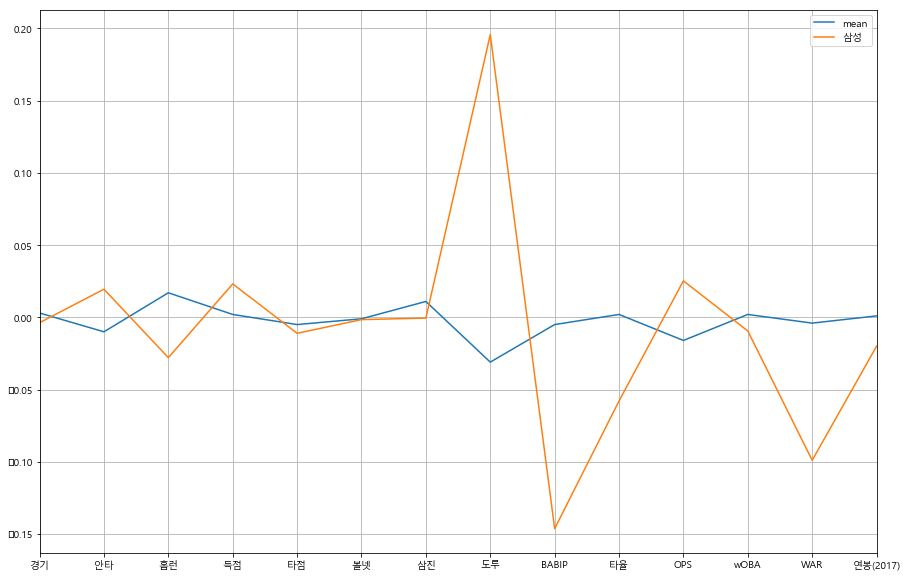

In [107]:
n = len(bat_df.columns[2:])
x_pos = np.arange(n)
plt.rcParams['figure.figsize'] = [15,  10]

bat_df.groupby('팀명').sum().mean().plot(label = 'mean')
bat_df[bat_df['팀명'] == '삼성'].mean().plot(label = '삼성')
plt.xticks(x_pos, bat_df.columns[2:].tolist())
plt.grid(True)
plt.legend()
plt.show()